In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
#load data
a_train= pd.read_csv("gdrive/My Drive/file/application_train.csv")
#menampilkan data
a_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#melihat jumlah dari target dengan label peminjam tidak bermasalah = 0 dan bermasalah = 1
a_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

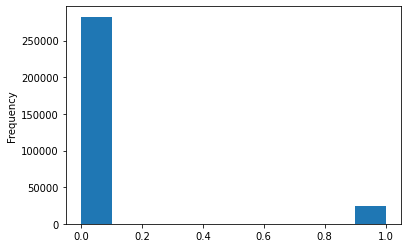

In [5]:
#diagram batang dari atribut target
a_train['TARGET'].astype(int).plot.hist();

In [6]:
#melihat tipe data
print(a_train.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


In [7]:
#analisa data
a_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
(a_train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [9]:
# mengubah anomali nilai dari Nan
a_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace= True)

In [10]:
#melihat jumlah nilai kosong
a_train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
a_train = a_train.fillna(a_train.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [12]:
#mencari korelasi dengan mengurutkan target
korelasi = a_train.corr()['TARGET'].sort_values()

#menjalankan korelasi
print('Korelasi paling postif:\n', korelasi.tail(15))
print('\nKorelasi paling negatif:\n', korelasi.head(15))

Korelasi paling postif:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031251
DEF_30_CNT_SOCIAL_CIRCLE       0.032222
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.070075
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Korelasi paling negatif:
 EXT_SOURCE_2                 -0.160303
EXT_SOURCE_3                 -0.157397
EXT_SOURCE_1                 -0.099152
AMT_GOODS_PRICE              -0.039628
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
FLOORSMAX_AVG                -0.029145
FLOORSMAX_MEDI               -0.028989
FLOORSM

Text(0.5, 0, 'target 0')

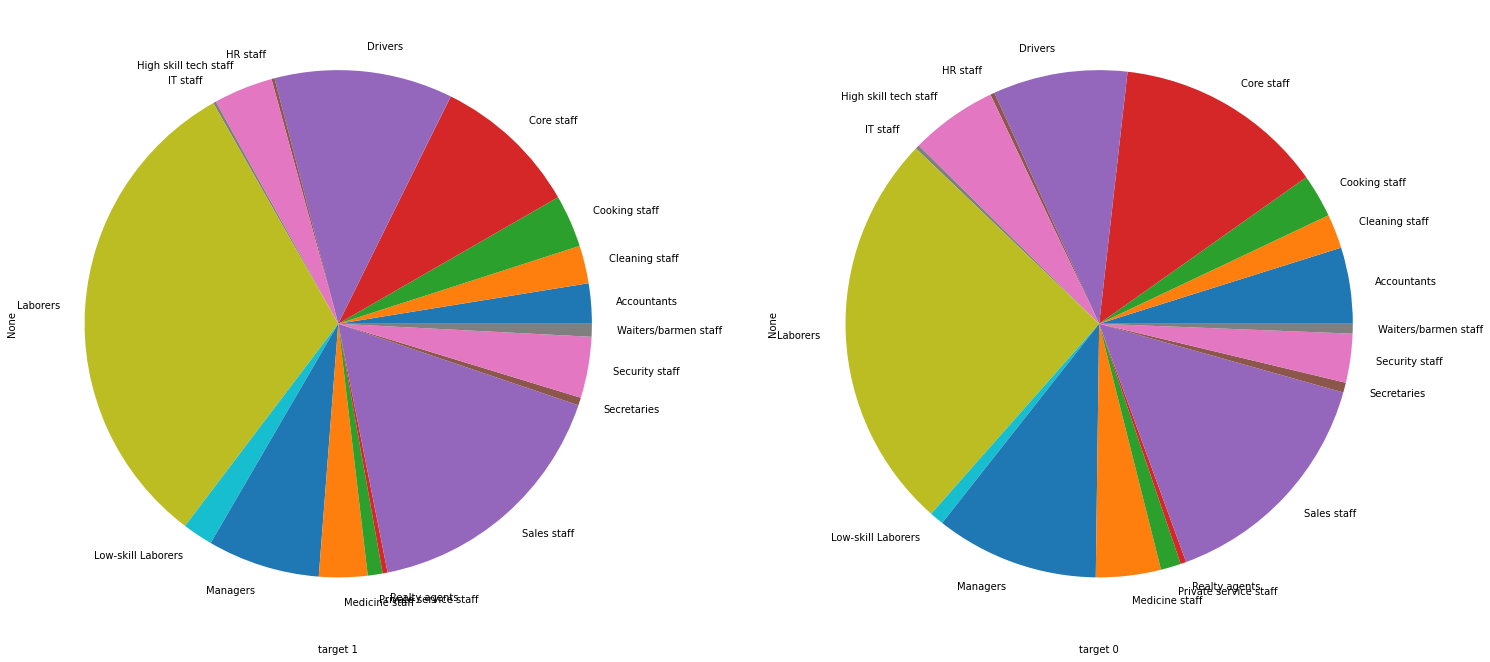

In [13]:
#Pekerjaan
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 15))
a_train.loc[a_train["TARGET"]==1, "OCCUPATION_TYPE"].reset_index().groupby("OCCUPATION_TYPE").size().plot(kind="pie", ax=ax1)
a_train.loc[a_train["TARGET"]==0, "OCCUPATION_TYPE"].reset_index().groupby("OCCUPATION_TYPE").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

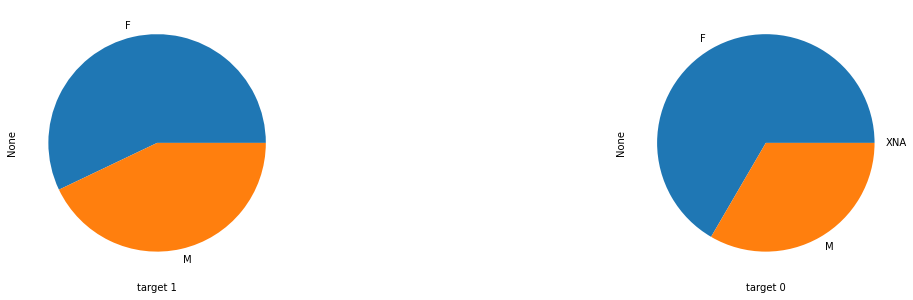

In [14]:
#Jenis Kelamin
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
a_train.loc[a_train["TARGET"]==1, "CODE_GENDER"].reset_index().groupby("CODE_GENDER").size().plot(kind="pie", ax=ax1)
a_train.loc[a_train["TARGET"]==0, "CODE_GENDER"].reset_index().groupby("CODE_GENDER").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

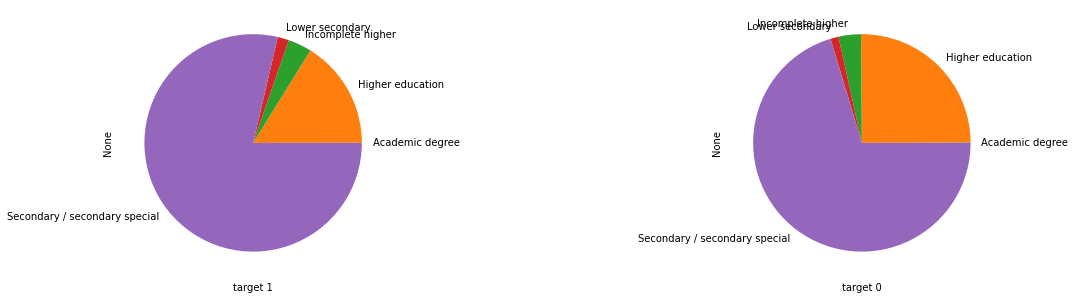

In [15]:
#Pendidikan Terakhir
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
a_train.loc[a_train["TARGET"]==1, "NAME_EDUCATION_TYPE"].reset_index().groupby("NAME_EDUCATION_TYPE").size().plot(kind="pie", ax=ax1)
a_train.loc[a_train["TARGET"]==0, "NAME_EDUCATION_TYPE"].reset_index().groupby("NAME_EDUCATION_TYPE").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

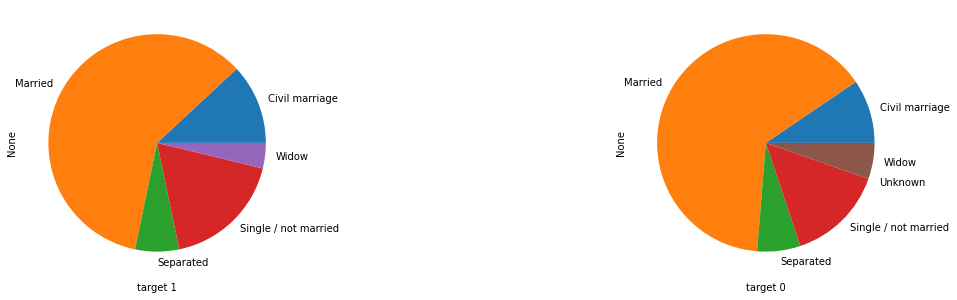

In [16]:
#Status 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
a_train.loc[a_train["TARGET"]==1, "NAME_FAMILY_STATUS"].reset_index().groupby("NAME_FAMILY_STATUS").size().plot(kind="pie", ax=ax1)
a_train.loc[a_train["TARGET"]==0, "NAME_FAMILY_STATUS"].reset_index().groupby("NAME_FAMILY_STATUS").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

Text(0.5, 0, 'target 0')

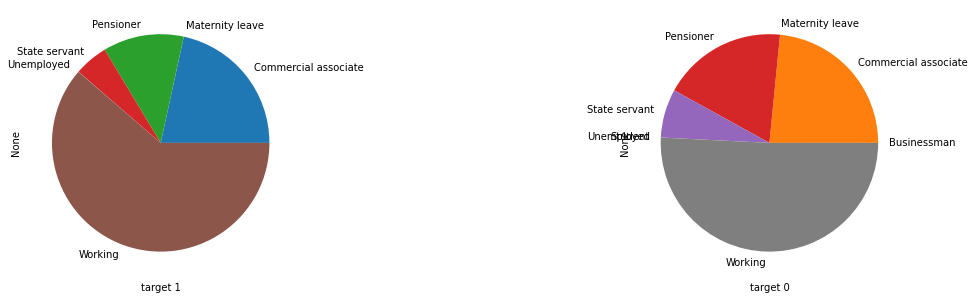

In [17]:
#Tipe Pedapatan
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
a_train.loc[a_train["TARGET"]==1, "NAME_INCOME_TYPE"].reset_index().groupby("NAME_INCOME_TYPE").size().plot(kind="pie", ax=ax1)
a_train.loc[a_train["TARGET"]==0, "NAME_INCOME_TYPE"].reset_index().groupby("NAME_INCOME_TYPE").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

In [18]:
#Memilih atribut yang digunakan
a_train_selected = a_train[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2','DAYS_BIRTH',
                                'DAYS_EMPLOYED','REG_CITY_NOT_WORK_CITY','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',
                                'REGION_RATING_CLIENT','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','CODE_GENDER', 
                                'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']]

In [19]:
#Transformasi Data Kategori
a_train_selected['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [20]:
#Mmengubah nilai atribut kategori pendidikan terakhir
scale_mapper = {'Lower secondary' : 0, 'Secondary / secondary special' : 1, 
'Incomplete higher' : 2, 'Higher education' : 3, 'Academic degree' : 4}

a_train_selected['NAME_EDUCATION_TYPE'] = a_train_selected['NAME_EDUCATION_TYPE'].replace(scale_mapper)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
#Hasil setelah di transformasi
a_train_selected['NAME_EDUCATION_TYPE'].unique()

array([1, 3, 2, 0, 4])

In [22]:
#tranformasi atribut jenis kelamin 
print("Jenis Kelamin : ")
a_train_selected['CODE_GENDER'].unique()

Jenis Kelamin : 


array(['M', 'F', 'XNA'], dtype=object)

In [23]:
#tranformasi atribut tipe pendapatan
print("Tipe Pendapatan : ")
a_train_selected['NAME_INCOME_TYPE'].unique()

Tipe Pendapatan : 


array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [24]:
#Buat dummies/one-hot encoding pada setiap atribut nominal dalam kerangka data kereta
CODE_GENDER_dummies = pd.get_dummies(a_train_selected['CODE_GENDER'],prefix='CODE_GENDER')
NAME_INCOME_TYPE_dummies = pd.get_dummies(a_train_selected['NAME_INCOME_TYPE'],prefix='NAME_INCOME_TYPE')

In [25]:
#menggabungkan data train
a_train_selected = pd.concat([a_train_selected, CODE_GENDER_dummies, NAME_INCOME_TYPE_dummies], axis=1)

#mengapus kategori sebelum di transformasi
a_train_selected = a_train_selected.drop(['CODE_GENDER','NAME_INCOME_TYPE'], axis=1)

In [26]:
#Menampilkan Data
a_train_selected.head()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_BIRTH,DAYS_EMPLOYED,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,...,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
0,1,0.139376,0.083037,0.262949,-9461,-637.0,0,-2120,-1134.0,2,...,1,0,0,0,0,0,0,0,0,1
1,0,0.510853,0.311267,0.622246,-16765,-1188.0,0,-291,-828.0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0.729567,0.502130,0.555912,-19046,-225.0,0,-2531,-815.0,2,...,1,0,0,0,0,0,0,0,0,1
3,0,0.510853,0.502130,0.650442,-19005,-3039.0,0,-2437,-617.0,2,...,0,0,0,0,0,0,0,0,0,1
4,0,0.510853,0.502130,0.322738,-19932,-3038.0,1,-3458,-1106.0,2,...,1,0,0,0,0,0,0,0,0,1


In [27]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import graphviz
from imblearn.over_sampling import SMOTE

In [28]:
#memisahkan atribut
y = a_train_selected.iloc[:, 0].values
x = a_train_selected.iloc[:, 1:24].values

In [29]:
#menngunakan smote untuk menghendel data yang tidak seimbang
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [30]:
#Skala data
sc = StandardScaler()
x_smote = sc.fit_transform(x_smote)

In [31]:
#Split train and test
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = .3, random_state = 10)

In [32]:
classifier =  LogisticRegression(max_iter=3000)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [33]:
#evaluasi hasil klasifikasi
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('akurasi : ', accuracy_score(y_test,  y_pred))
print('ROC AUC :', roc_auc_score(y_test,y_pred))

[[58119 26865]
 [26099 58529]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69     84984
           1       0.69      0.69      0.69     84628

    accuracy                           0.69    169612
   macro avg       0.69      0.69      0.69    169612
weighted avg       0.69      0.69      0.69    169612

akurasi :  0.6877343584180364
ROC AUC : 0.6877424618614614


In [34]:
#peringkat debitur
predic = classifier.predict_proba(x_test)
predic

array([[0.43819085, 0.56180915],
       [0.48292621, 0.51707379],
       [0.3327998 , 0.6672002 ],
       ...,
       [0.55023637, 0.44976363],
       [0.15587546, 0.84412454],
       [0.41978794, 0.58021206]])

In [35]:
df_prediction_prob = pd.DataFrame(predic, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(x_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

df=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
df.sort_values(by=['prob_0'],  ascending=[False],inplace=True)

In [36]:
df

,Actual Outcome,prob_0,prob_1,predicted_TARGET
19835,0,1.0,9.337748e-09,0
52465,0,1.0,1.311686e-08,0
125173,0,1.0,1.565466e-08,0
61720,0,1.0,2.779396e-08,0
2196,0,1.0,5.012866e-08,0
...,...,...,...,...
30737,0,0.0,1.000000e+00,1
130848,0,0.0,1.000000e+00,1
76644,1,0.0,1.000000e+00,1
89058,1,0.0,1.000000e+00,1


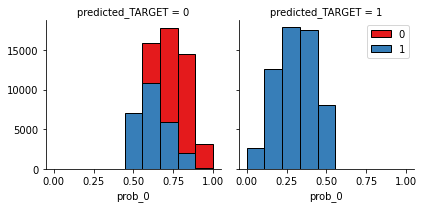

In [40]:
#membandingkan dengan hasil sebenarnya dengan hasil prediksi dengan probabilitas 0
bins = np.linspace(df.prob_1.min(), df.prob_1.max(), 10)
g = sns.FacetGrid(df, col="predicted_TARGET", hue="Actual Outcome", palette="Set1", col_wrap=2)
g.map(plt.hist, 'prob_0', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

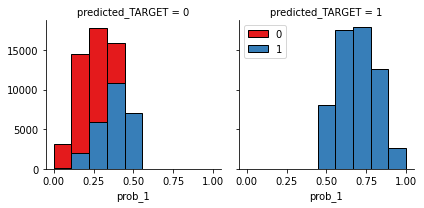

In [38]:
#membandingkan dengan hasil sebenarnya dengan hasil prediksi dengan probabilitas 1
bins = np.linspace(df.prob_1.min(), df.prob_1.max(), 10)
g = sns.FacetGrid(df, col="predicted_TARGET", hue="Actual Outcome", palette="Set1", col_wrap=2)
g.map(plt.hist, 'prob_1', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()